In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [2]:
!pip install opendatasets

In [3]:
import opendatasets as od
od.download(
   "https://www.kaggle.com/datasets/gti-upm/leapgestrecog/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: abdallatamer
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/gti-upm/leapgestrecog


100%|██████████| 2.13G/2.13G [00:16<00:00, 139MB/s]


In [5]:
import warnings
warnings.filterwarnings('ignore')
import keras
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from keras.layers import Conv2D, Activation, MaxPool2D, Dense, Flatten, Dropout

In [8]:
CATEGORIES = ["01_palm", '02_l','03_fist','04_fist_moved','05_thumb','06_index','07_ok','08_palm_moved','09_c','10_down']
IMG_SIZE = 50
data_path = "/content/leapgestrecog/leapGestRecog"

In [9]:
image_data = []
for dr in os.listdir(data_path):
    for category in CATEGORIES:
        class_index = CATEGORIES.index(category)
        path = os.path.join(data_path, dr, category)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                image_data.append([cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE)), class_index])
            except Exception as e:
                pass
image_data[0]

[array([[ 4,  5,  5, ...,  4,  3,  4],
        [ 4,  4,  6, ...,  4,  4,  5],
        [ 4,  5,  6, ...,  3,  4,  4],
        ...,
        [13, 16, 23, ...,  5,  4,  4],
        [14, 18, 24, ...,  4,  5,  4],
        [12, 18, 20, ...,  4,  4,  5]], dtype=uint8),
 0]

In [10]:
import random
random.shuffle(image_data)
input_data = []
label = []

In [12]:
for X, y in image_data:
    input_data.append(X)
    label.append(y)
label[:10]

[0, 2, 5, 8, 3, 4, 2, 4, 1, 3]

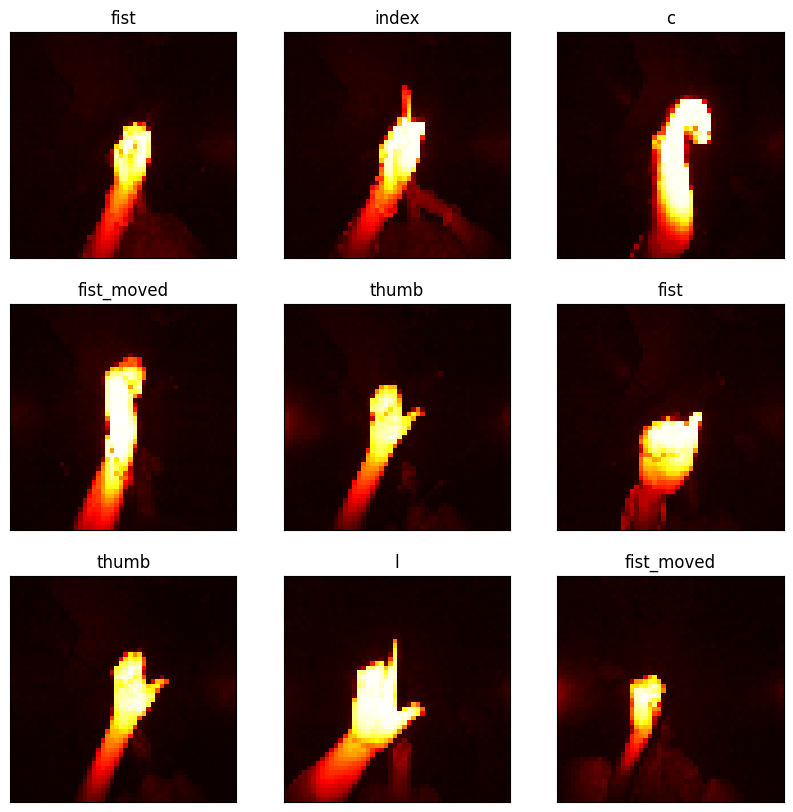

In [13]:
plt.figure(1, figsize=(10,10))
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(image_data[i][0], cmap='hot')
    plt.xticks([])
    plt.yticks([])
    plt.title(CATEGORIES[label[i]][3:])
plt.show()

In [14]:
input_data = np.array(input_data)
label = np.array(label)
input_data = input_data/255.0
input_data.shape

(40000, 50, 50)

In [15]:
label = keras.utils.to_categorical(label, num_classes=10)
label[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [16]:
input_data.shape = (-1, IMG_SIZE, IMG_SIZE, 1)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_data, label, test_size = 0.3, random_state=0)

In [18]:
model = keras.models.Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = (IMG_SIZE, IMG_SIZE, 1)))
model.add(Activation('relu'))


model.add(Conv2D(filters = 32, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 64, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer = 'Adam',
             metrics = ['accuracy'])

In [19]:
model.fit(X_train, y_train, epochs = 7, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/7
875/875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8267 - loss: 0.5190 - val_accuracy: 0.9961 - val_loss: 0.0163
Epoch 2/7
875/875 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.9958 - loss: 0.0131 - val_accuracy: 0.9938 - val_loss: 0.0162
Epoch 3/7
875/875 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9969 - loss: 0.0117 - val_accuracy: 0.9996 - val_loss: 9.5695e-04
Epoch 4/7
875/875 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9981 - loss: 0.0055 - val_accuracy: 0.9997 - val_loss: 0.0011
Epoch 5/7
875/875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9981 - loss: 0.0061 - val_accuracy: 0.9998 - val_loss: 2.3073e-04
Epoch 6/7
875/875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9988 - loss: 0.0042 - val_accuracy: 0.9997 - val_loss: 6.6348e-04
Epoch 7/7
875/875 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9988 - loss: 0.0047 - val_accuracy: 0.9997 - val_loss: 0.0021


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 48, 48, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 46, 46, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 46, 46, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 21, 21, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       1,638,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,007,872 (19.10 MB)

 Trainable params: 1,669,290 (6.37 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,338,582 (12.74 MB)

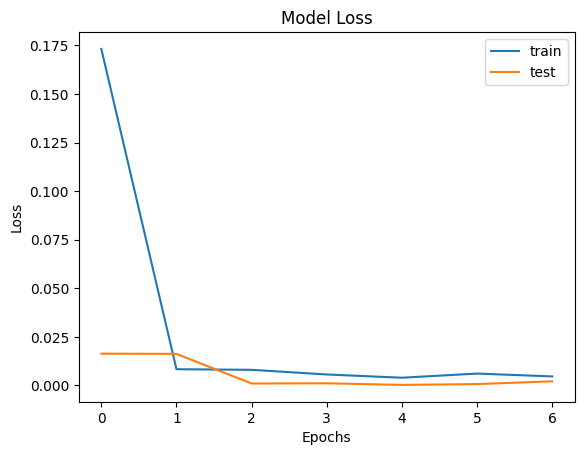

In [21]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

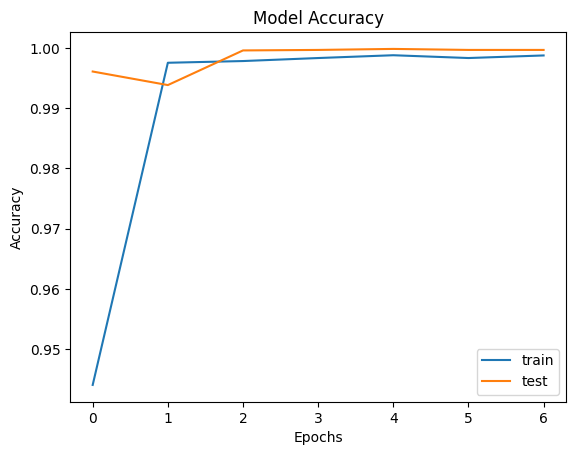

In [22]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [23]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Test accuracy: {:2.2f}%'.format(test_accuracy*100))

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9996 - loss: 0.0025
Test accuracy: 99.97%


375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


[]

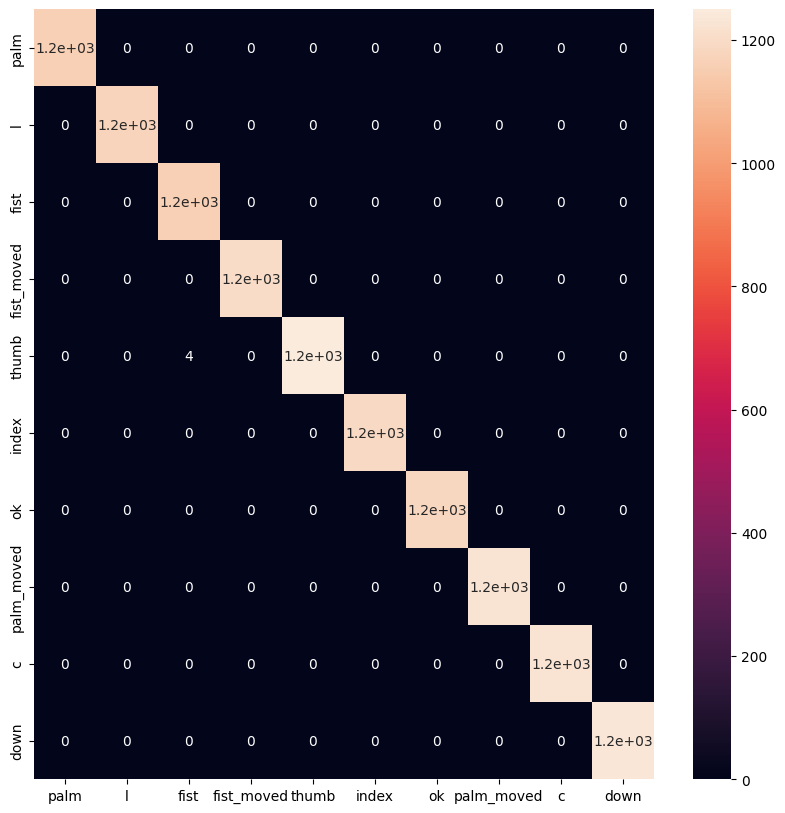

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
cat = [c[3:] for c in CATEGORIES]
plt.figure(figsize=(10,10))
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(model.predict(X_test), axis=1))
sn.heatmap(cm, annot=True,xticklabels=cat, yticklabels=cat)
plt.plot()